#**CS210 PROJECT - EREN YAMAK - 31283**

This project aims to determine my Netflix habits. Mainly, I'd like to see if I'm watching more when the weather is bad (ie. during winters and falls).

The datasets used in the project are mainly the datasets that I have imported from Netflix; the Viewing Activities, Payments, Notifications etc.

### **My Null Hypothesis (H0)**:
I spend more time on Netflix during cold weathers.

### **My Alternative Hypothesis (H1)**:
There is no correlation between weather and my watch-time habits.



#Importing Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


#EDA (Exploratory Data Analysis)

DataFrame for Viewing Activity:
  Profile Name           Start Time  Duration  \
0     Onur ps5  2023-11-24 20:33:54  00:00:22   
1     Onur ps5  2023-11-24 20:25:14  00:00:11   
2     Onur ps5  2023-11-24 20:24:06  00:00:35   
3     Onur ps5  2023-11-24 20:21:04  00:00:07   
4     Onur ps5  2023-11-24 20:20:15  00:00:29   

                        Attributes                                Title  \
0  Autoplayed: user action: None;       Aile Arasında_hook_primary_16x9   
1  Autoplayed: user action: None;   The Killer (Kısa Video): The Killer   
2  Autoplayed: user action: None;                         Shrek - CLM 3   
3  Autoplayed: user action: None;             Triple Frontier (Fragman)   
4  Autoplayed: user action: None;   Acı Reçete (Kısa Video): Acı Reçete   

  Supplemental Video Type          Device Type  Bookmark Latest Bookmark  \
0                    HOOK  Chrome PC (Cadmium)  00:00:23        00:00:23   
1                    HOOK  Chrome PC (Cadmium)  00:00:11        00:00:

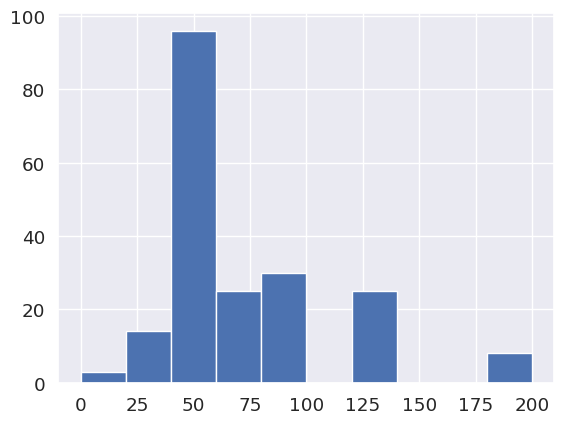


Correlation Matrix for Billing History:


<ipython-input-67-685a90190d93>:45: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(billing_history_data.corr(), annot=True)


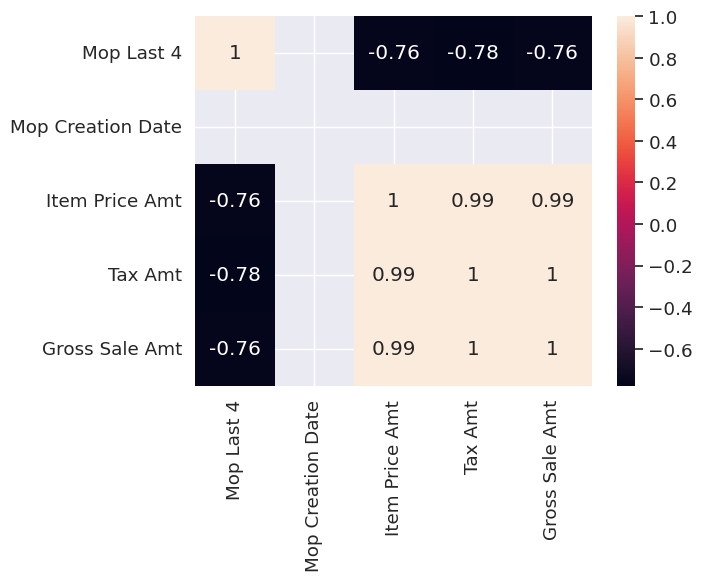

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

viewing_activity_filepath = 'ViewingActivity.csv'
viewing_data = pd.read_csv(viewing_activity_filepath)
print("DataFrame for Viewing Activity:")
print(viewing_data.head())
ratings_filepath = 'Ratings.csv'
ratings_data = pd.read_csv(ratings_filepath)
print("\nDataFrame for Ratings:")
print(ratings_data.head())
search_history_filepath = 'SearchHistory.csv'
search_history_data = pd.read_csv(search_history_filepath)
print("\nDataFrame for Search History:")
print(search_history_data.head())
messages_filepath = 'MessagesSentByNetflix.csv'
messages_data = pd.read_csv(messages_filepath)
print("\nDataFrame for Messages Sent by Netflix:")
print(messages_data.head())
mylist_filepath = 'MyList.csv'
mylist_data = pd.read_csv(mylist_filepath)
print("DataFrame for My List:")
print(mylist_data.head())
billing_history_filepath = 'BillingHistory.csv'
billing_history_data = pd.read_csv(billing_history_filepath)
print("\nDataFrame for Billing History:")
print(billing_history_data.head())

print("Descriptive Statistics for My List:")
print(mylist_data.describe(include='all'))
print("\nDescriptive Statistics for Billing History:")
print(billing_history_data.describe())
print("\nDescriptive Statistics for Viewing Activity:")
print(viewing_data.describe())
print("\nDescriptive Statistics for Ratings:")
print(ratings_data.describe())
print("\nDescriptive Statistics for Search History:")
print(search_history_data.describe())
print("\nHistogram for Gross Sale Amount:")
billing_history_data['Gross Sale Amt'].hist()
plt.show()
if 'Gross Sale Amt' in billing_history_data.columns:
    print("\nCorrelation Matrix for Billing History:")
    sns.heatmap(billing_history_data.corr(), annot=True)
    plt.show()



# Billing Information


In [ ]:

billing_data = pd.read_csv('BillingHistory.csv')
billing_data['Transaction Date'] = pd.to_datetime(billing_data['Transaction Date'])
cc_approved_payments = billing_data.loc[
    (billing_data['Payment Type'] == 'CC') & (billing_data['Pmt Status'] == 'APPROVED')
].copy()
cc_approved_payments['Year-Month'] = cc_approved_payments['Transaction Date'].dt.to_period('M')
cc_approved_payment_summary = cc_approved_payments[['Year-Month', 'Gross Sale Amt']]
cc_approved_payment_summary_df = cc_approved_payment_summary.groupby('Year-Month').sum().reset_index()
print(cc_approved_payment_summary_df)

   Year-Month  Gross Sale Amt
0     2019-01            0.00
1     2019-02           39.99
2     2019-03           39.99
3     2019-04           39.99
4     2019-05           39.99
5     2019-06           39.99
6     2019-07           39.99
7     2019-08           41.99
8     2019-09           41.99
9     2019-10           41.99
10    2019-11           41.99
11    2019-12           41.99
12    2020-07           41.99
13    2020-08           41.99
14    2020-09           41.99
15    2020-10           41.99
16    2020-11           41.99
17    2020-12           41.99
18    2021-01           41.99
19    2021-02           41.99
20    2021-03           41.99
21    2021-04           41.99
22    2021-05           54.99
23    2021-06           54.99
24    2021-07           54.99
25    2021-08           54.99
26    2021-09           54.99
27    2021-10           54.99
28    2021-11           54.99
29    2021-12           54.99
30    2022-01           54.99
31    2022-02           54.99
32    2022

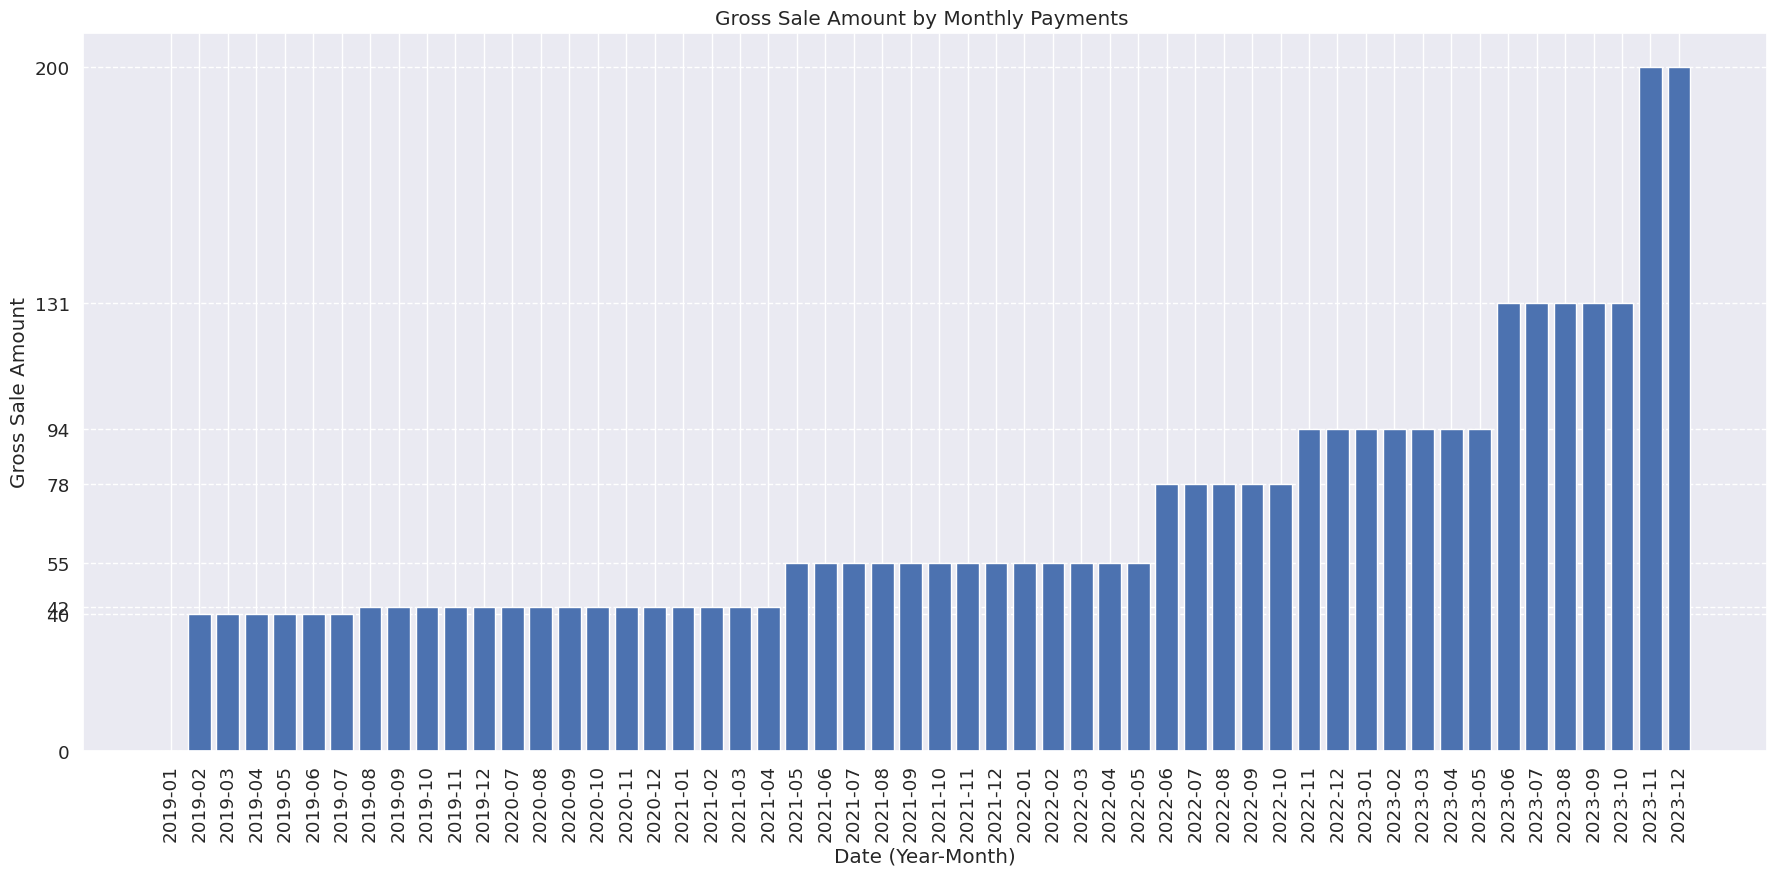

In [ ]:

cc_approved_payment_summary_df['Year-Month'] = cc_approved_payment_summary_df['Year-Month'].astype(str)
plt.figure(figsize=(18, 9))
bars = plt.bar(cc_approved_payment_summary_df['Year-Month'], cc_approved_payment_summary_df['Gross Sale Amt'])
plt.xlabel('Date (Year-Month)')
plt.ylabel('Gross Sale Amount')
plt.title('Gross Sale Amount by Monthly Payments ')
plt.xticks(rotation=90)
payment_amounts = cc_approved_payment_summary_df['Gross Sale Amt'].unique()
plt.yticks(payment_amounts)
plt.grid(axis='y', linestyle='dashed', alpha=1)
plt.tight_layout()
plt.show()


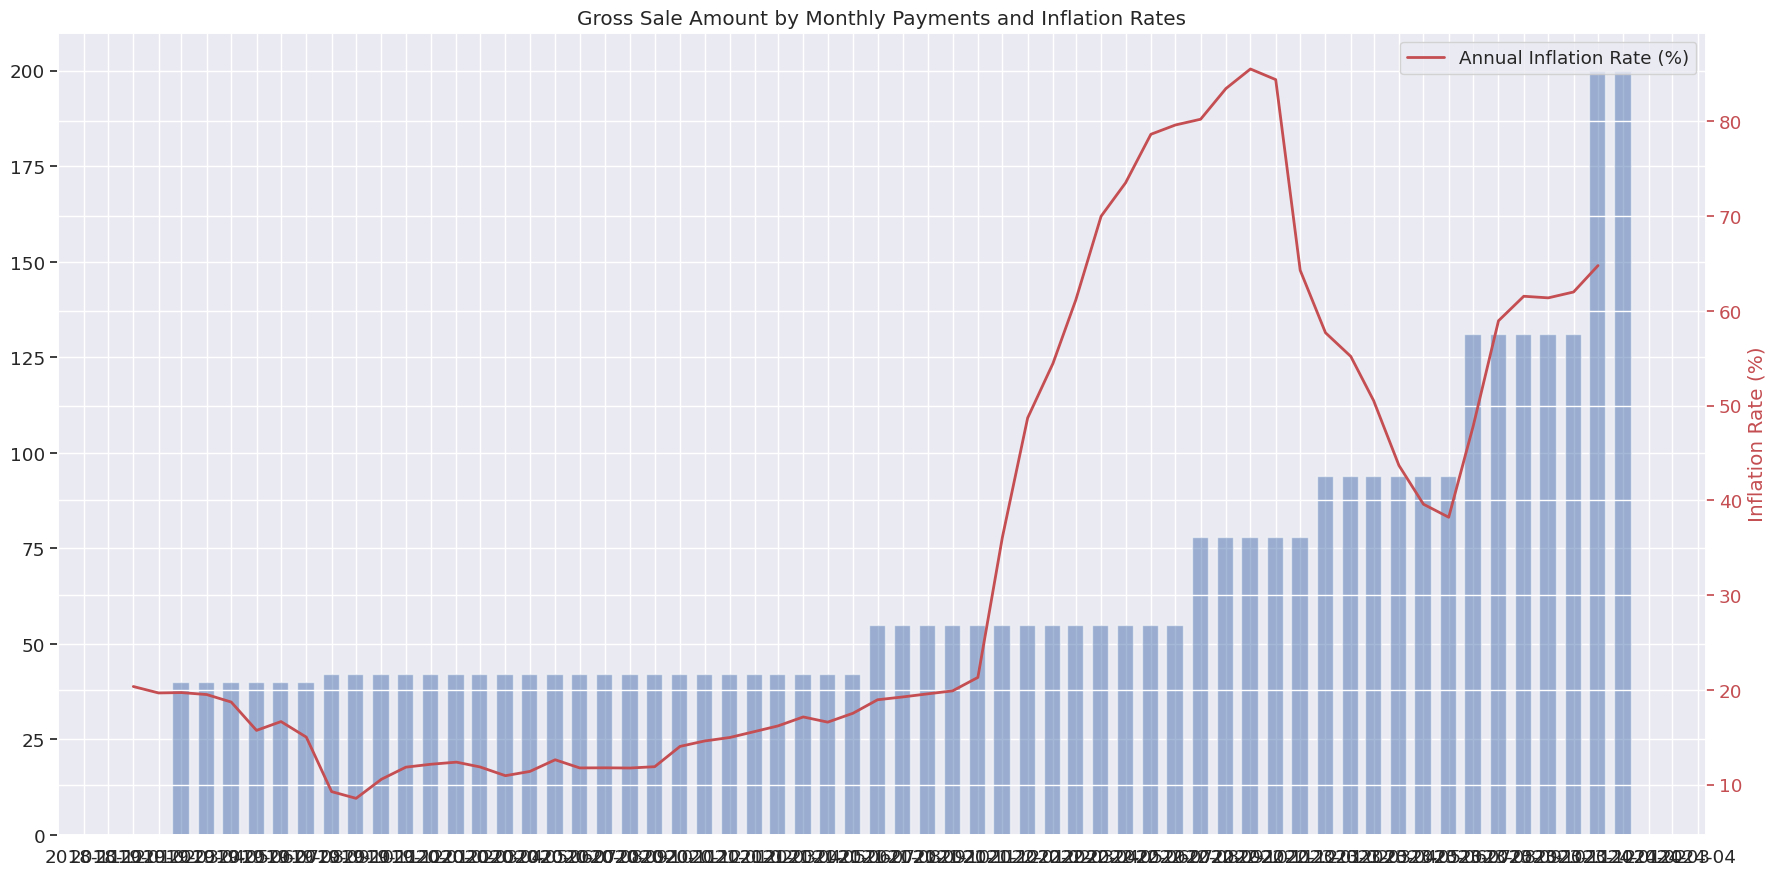

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load and prepare the inflation data
inflation_data = {
    'Date': ["12-2023", "11-2023", "10-2023", "09-2023", "08-2023", "07-2023",
             "06-2023", "05-2023", "04-2023", "03-2023", "02-2023", "01-2023",
             "12-2022", "11-2022", "10-2022", "09-2022", "08-2022", "07-2022",
             "06-2022", "05-2022", "04-2022", "03-2022", "02-2022", "01-2022",
             "12-2021", "11-2021", "10-2021", "09-2021", "08-2021", "07-2021",
             "06-2021", "05-2021", "04-2021", "03-2021", "02-2021", "01-2021",
             "12-2020", "11-2020", "10-2020", "09-2020", "08-2020", "07-2020",
             "06-2020", "05-2020", "04-2020", "03-2020", "02-2020", "01-2020",
             "12-2019", "11-2019", "10-2019", "09-2019", "08-2019", "07-2019",
             "06-2019", "05-2019", "04-2019", "03-2019", "02-2019", "01-2019"],
    'Annual Change (%)': [64.77, 61.98, 61.36, 61.53, 58.94, 47.83,
                          38.21, 39.59, 43.68, 50.51, 55.18, 57.68,
                          64.27, 84.39, 85.51, 83.45, 80.21, 79.60,
                          78.62, 73.50, 69.97, 61.14, 54.44, 48.69,
                          36.08, 21.31, 19.89, 19.58, 19.25, 18.95,
                          17.53, 16.59, 17.14, 16.19, 15.61, 14.97,
                          14.60, 14.03, 11.89, 11.75, 11.77, 11.76,
                          12.62, 11.39, 10.94, 11.86, 12.37, 12.15,
                          11.84, 10.56, 8.55, 9.26, 15.01, 16.65,
                          15.72, 18.71, 19.50, 19.71, 19.67, 20.35]
}
inflation_df = pd.DataFrame(inflation_data)
inflation_df['Date'] = pd.to_datetime(inflation_df['Date'], format='%m-%Y')

# Prepare the billing data
billing_data = {
    'Year-Month': pd.date_range(start='2019-01-01', periods=60, freq='M'),
    'Gross Sale Amt': [
        0.00, 39.99, 39.99, 39.99, 39.99, 39.99, 39.99, 41.99, 41.99, 41.99,
        41.99, 41.99, 41.99, 41.99, 41.99, 41.99, 41.99, 41.99, 41.99 ,
        41.99, 41.99, 41.99, 41.99, 41.99, 41.99, 41.99, 41.99,
        41.99, 41.99, 54.99, 54.99, 54.99, 54.99, 54.99, 54.99, 54.99, 54.99,
        54.99, 54.99, 54.99, 54.99, 54.99, 77.99, 77.99, 77.99, 77.99, 77.99,
        93.99, 93.99, 93.99, 93.99, 93.99, 93.99, 130.99, 130.99, 130.99,
        130.99, 130.99, 199.99, 199.99
    ]
}
billing_df = pd.DataFrame(billing_data)

# Plotting
plt.figure(figsize=(18, 9))
plt.bar(billing_df['Year-Month'], billing_df['Gross Sale Amt'], color='b', width=20, alpha=0.5, label='Gross Sale Amount', align='center')
ax2 = plt.gca().twinx()
ax2.plot(inflation_df['Date'], inflation_df['Annual Change (%)'], color='r', label='Annual Inflation Rate (%)', lw=2, zorder=3)
plt.title('Gross Sale Amount by Monthly Payments and Inflation Rates')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Gross Sale Amount')
ax2.set_ylabel('Inflation Rate (%)', color='r')
ax2.tick_params('y', colors='r')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90, verticalalignment='center')
#plt.subplots_adjust(bottom=0.0001)  # Increase the bottom margin
plt.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


                   Gross Sale Amt  Annual Change (%)
Gross Sale Amt           1.000000           0.596638
Annual Change (%)        0.596638           1.000000


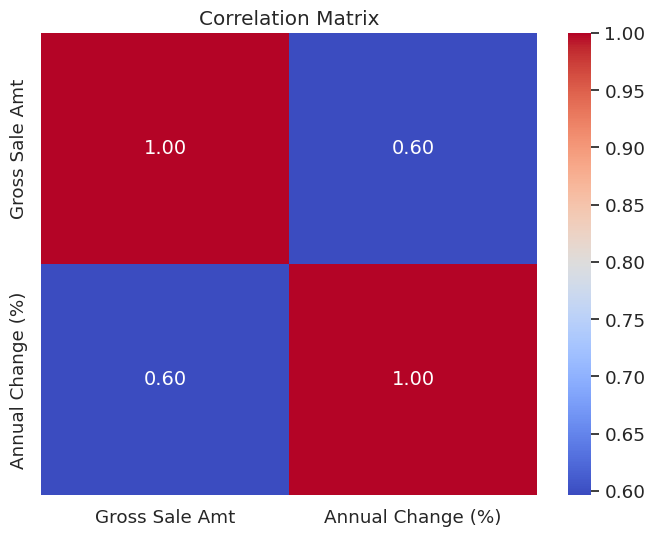

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ... (Your code for loading and preparing data) ...

# Resample the inflation data to monthly frequency
inflation_df_resampled = inflation_df.set_index('Date').resample('M').mean().reset_index()

# Merge the two dataframes based on 'Year-Month' column
merged_df = pd.merge(billing_df, inflation_df_resampled, left_on='Year-Month', right_on='Date', how='inner')

# Calculate the correlation matrix
correlation_matrix = merged_df[['Gross Sale Amt', 'Annual Change (%)']].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 14})
plt.title('Correlation Matrix')
plt.show()

# Viewing Activity

In [ ]:
df  = pd.read_csv('ViewingActivity_Only_Me.csv')
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df = df.set_index('Start Time')
df.index = df.index.tz_convert('US/Eastern')
df = df.reset_index()
df = df[df['Profile Name'] == 'eren']
df = df.drop(["Attributes", "Supplemental Video Type","Country"], axis=1)


df['Duration'] = pd.to_timedelta(df['Duration'])

# Extract a common identifier from the titles
df['Show Identifier'] = df['Title'].str.extract(r'^(.*?)\:')

# Group by the common identifier and sum the durations
result = df.groupby('Show Identifier')['Duration'].sum().reset_index()

most_watched_show = result.loc[result['Duration'].idxmax()]
total_duration = most_watched_show['Duration']
days, seconds = total_duration.days, total_duration.seconds
hours, seconds = divmod(seconds, 3600)
minutes, seconds = divmod(seconds, 60)

# Print the most-watched show with the formatted duration
print("Most-watched show:")
print(f"Show Identifier: {most_watched_show['Show Identifier']}")
print(f"Duration: {days} days, {hours} hours, {minutes} minutes, and {seconds} seconds // or {days*24*60+60*hours+minutes} minutes" )

Most-watched show:
Show Identifier: Brooklyn Nine-Nine
Duration: 5 days, 16 hours, 7 minutes, and 46 seconds // or 8167 minutes


1. Brooklyn Nine-Nine: 8167.77 minutes
2. The Office: 4962.28 minutes
3. Rick and Morty: 3514.82 minutes
4. Big Mouth: 3446.72 minutes
5. Better Call Saul: 3195.25 minutes
6. Breaking Bad: 3096.33 minutes
7. Community: 2639.28 minutes
8. BoJack Horseman: 1921.93 minutes
9. The Umbrella Academy: 1500.20 minutes
10. Black Mirror: 1260.47 minutes




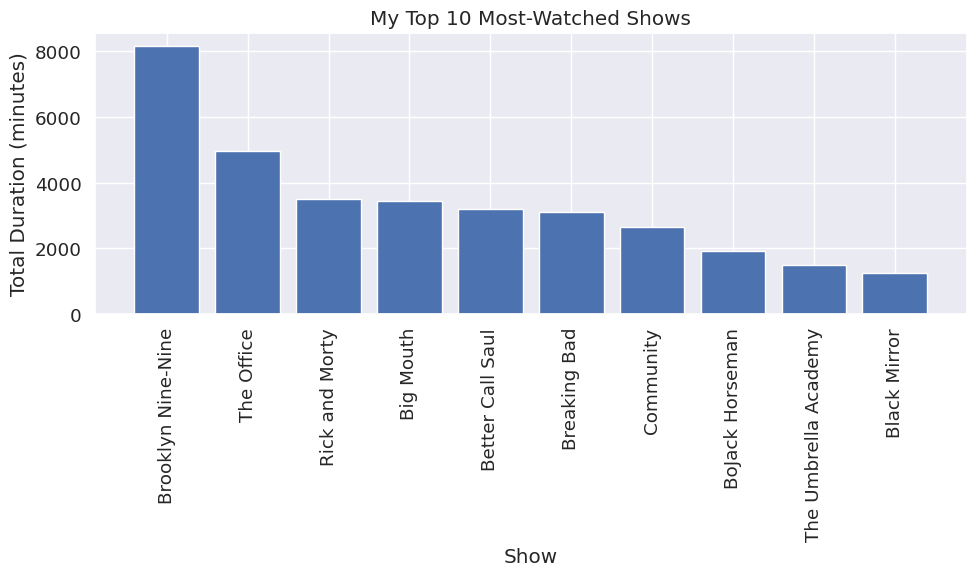

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df['Duration'] = pd.to_timedelta(df['Duration'])

df['Show Identifier'] = df['Title'].str.extract(r'^(.*?)\:')

result = df.groupby('Show Identifier')['Duration'].sum().reset_index()

top_10_shows = result.sort_values(by='Duration', ascending=False).head(10)

top_10_shows['Duration_minutes'] = top_10_shows['Duration'].dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
plt.bar(top_10_shows['Show Identifier'], top_10_shows['Duration_minutes'])
plt.xlabel('Show')
plt.ylabel('Total Duration (minutes)')
plt.title('My Top 10 Most-Watched Shows')
plt.xticks(rotation=90)
plt.tight_layout()

for i, (index, row) in enumerate(top_10_shows.iterrows(), start=1):
    print(f"{i}. {row['Show Identifier']}: {row['Duration_minutes']:.2f} minutes")

print("\n")
plt.show()


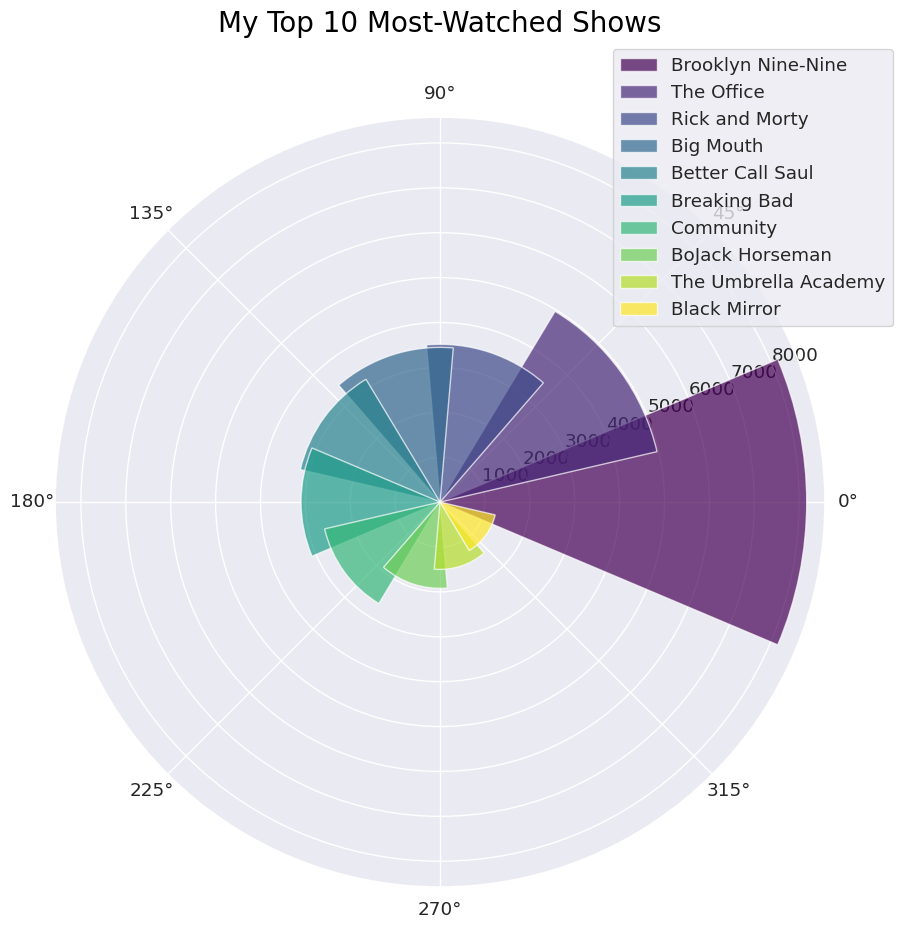

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming top_10_shows is already defined and contains 'Duration_minutes'

# Number of variables we're plotting.
num_vars = len(top_10_shows['Show Identifier'])

# Create a color palette:
colors = plt.cm.viridis(np.linspace(0, 1, num_vars))

# Split the circle into even parts and save the angles
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is made in a circular (polar) coordinate system, so we need to close the loop
angles += angles[:1]

# The plot is circular, so we need to "complete the loop" and draw the bars all the way around
values = top_10_shows['Duration_minutes'].tolist()
values += values[:1]

# Initialize the spider plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Draw one bar for each show with a distinct color
bars = ax.bar(angles[:-1], values[:-1], color=colors, alpha=0.7)

# Use a legend to identify each show instead of the titles
ax.legend(bars, top_10_shows['Show Identifier'], loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Set the title of the chart
plt.title('My Top 10 Most-Watched Shows', size=20, color='black', y=1.1)

# Show the plot
plt.show()





# Viewing Activity (Entire Family)

Most-watched show for Nergiz:
Show Identifier: Homeland
Duration: 2 days, 22 hours, 17 minutes, and 51 seconds


Most-watched show for Onur:
Show Identifier: Friends
Duration: 3 days, 11 hours, 29 minutes, and 18 seconds


Most-watched show for Mehmet:
Show Identifier: Yanik Koza
Duration: 1 days, 23 hours, 20 minutes, and 43 seconds


Most-watched show for Semih:
Show Identifier: Friends
Duration: 5 days, 11 hours, 59 minutes, and 49 seconds




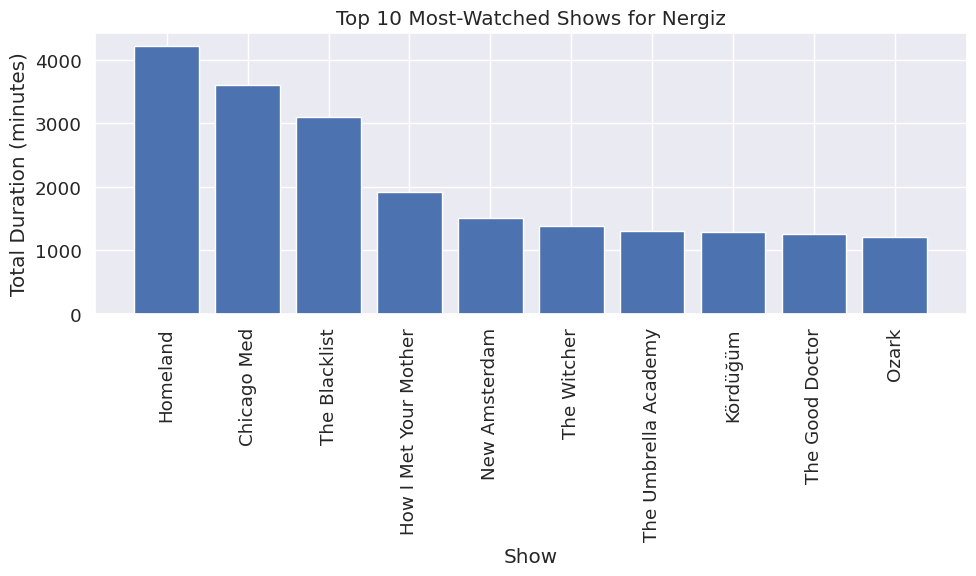

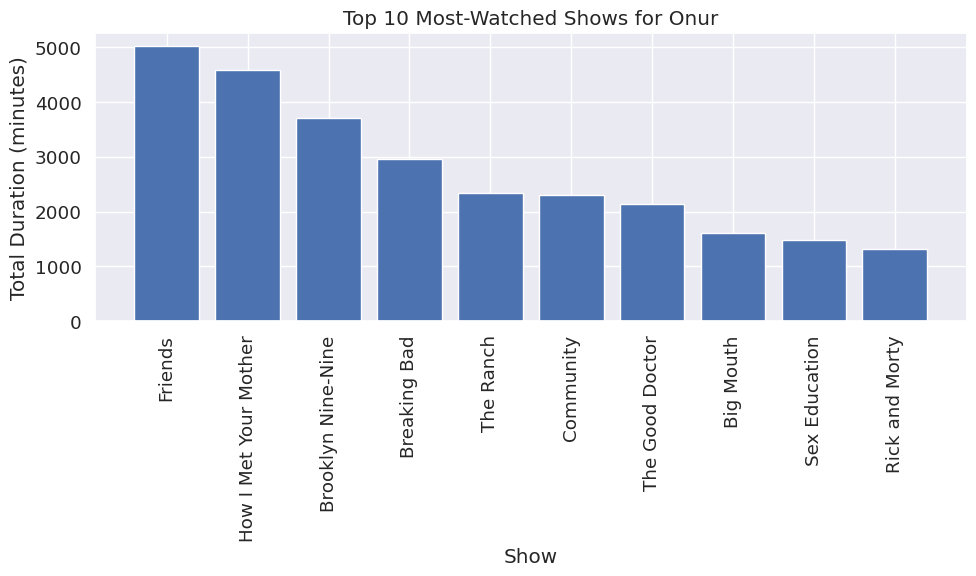

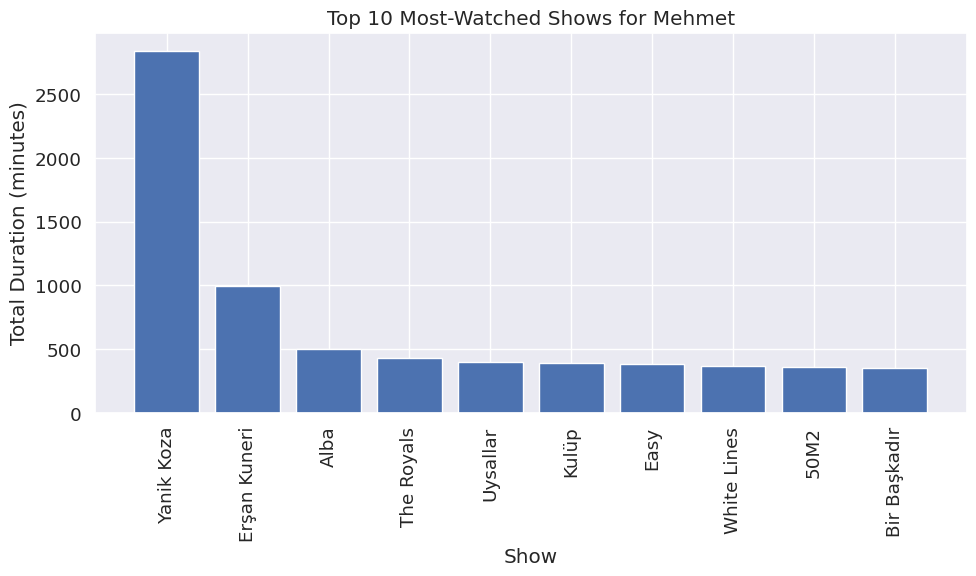

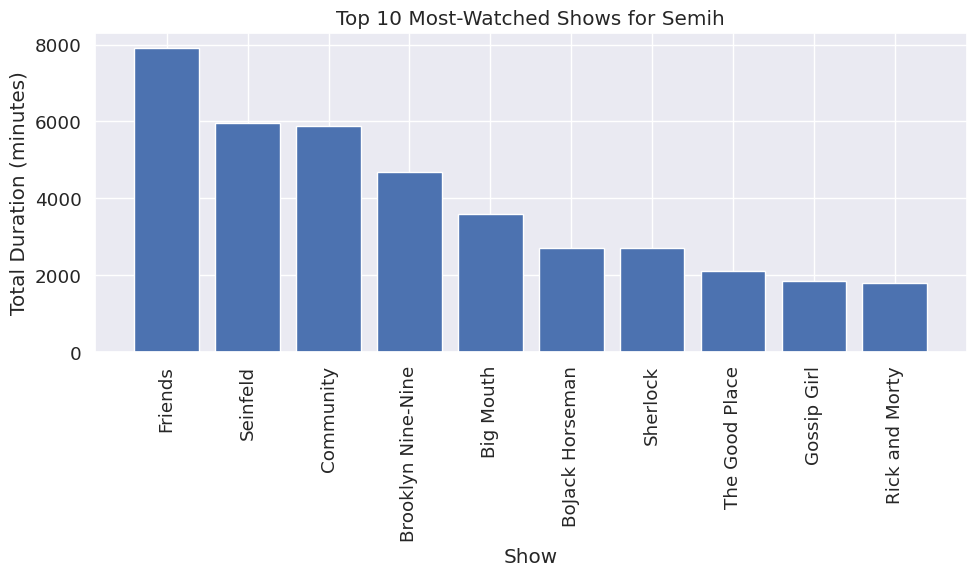

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'ViewingActivity.csv'
df = pd.read_csv(file_path)
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df = df.set_index('Start Time')
df.index = df.index.tz_convert('US/Eastern')
df = df.reset_index()
df['Profile Name'].replace({'Onur ps5': 'Onur', 'thanks bro': 'Semih', 'nergiz': 'Nergiz', 'mehmet':'Mehmet'}, inplace=True)
profiles = ["Nergiz", "Onur", "Mehmet", "Semih"]
df_filtered = df[df['Profile Name'].isin(profiles)].copy()
df_filtered['Duration'] = pd.to_timedelta(df_filtered['Duration'])
df_filtered['Show Identifier'] = df_filtered['Title'].str.extract(r'^(.*?)\:')
grouped_data = df_filtered.groupby(['Profile Name', 'Show Identifier'])['Duration'].sum().reset_index()
most_watched_shows_by_profile = {}
for profile in profiles:
    profile_data = grouped_data[grouped_data['Profile Name'] == profile]
    if not profile_data.empty:
        most_watched_show = profile_data.loc[profile_data['Duration'].idxmax()]
        most_watched_shows_by_profile[profile] = most_watched_show
for profile, most_watched_show in most_watched_shows_by_profile.items():
    if most_watched_show is not None:
        total_duration = most_watched_show['Duration']
        days, seconds = total_duration.days, total_duration.seconds
        hours, seconds = divmod(seconds, 3600)
        minutes, seconds = divmod(seconds, 60)
        print(f"Most-watched show for {profile}:")
        print(f"Show Identifier: {most_watched_show['Show Identifier']}")
        print(f"Duration: {days} days, {hours} hours, {minutes} minutes, and {seconds} seconds")
        print("\n")
for profile in profiles:
    profile_data = grouped_data[grouped_data['Profile Name'] == profile]
    top_shows = profile_data.sort_values(by='Duration', ascending=False).head(10)
    if not top_shows.empty:
        top_shows['Duration_minutes'] = top_shows['Duration'].dt.total_seconds() / 60
        plt.figure(figsize=(10, 6))
        plt.bar(top_shows['Show Identifier'], top_shows['Duration_minutes'])
        plt.xlabel('Show')
        plt.ylabel('Total Duration (minutes)')
        plt.title(f'Top 10 Most-Watched Shows for {profile}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()



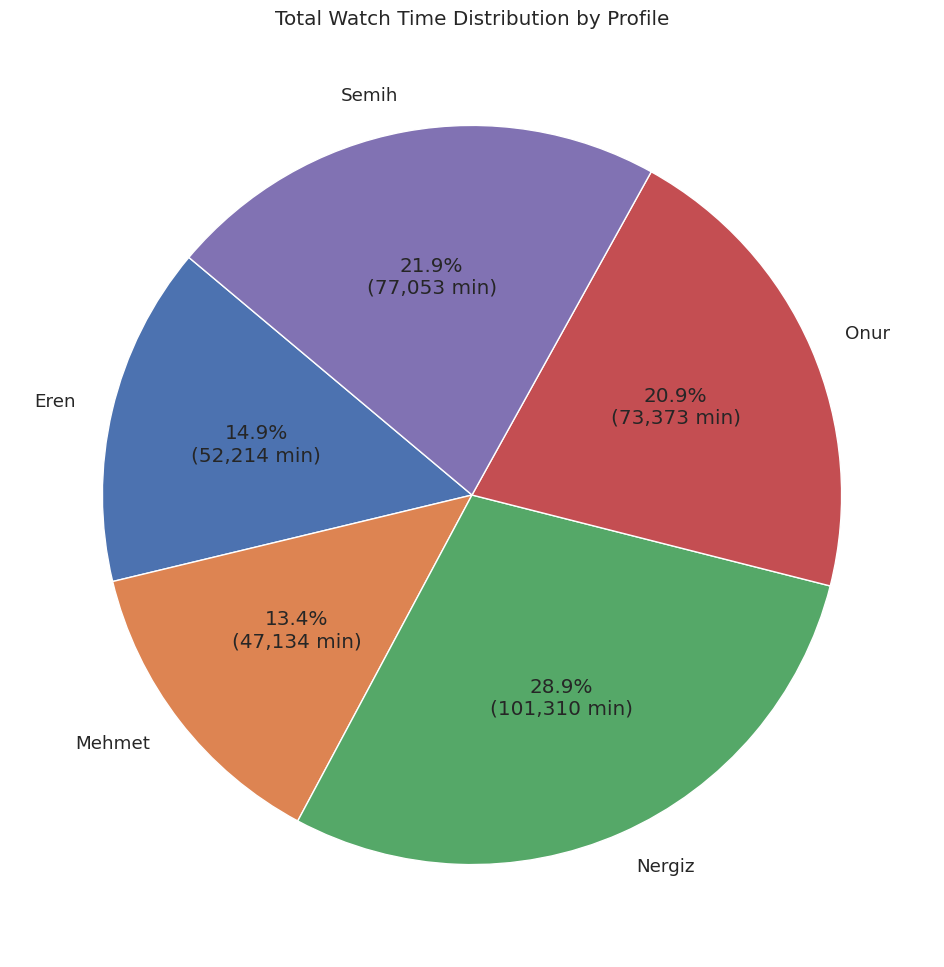

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

viewing_activity_filepath = 'ViewingActivity.csv'
viewing_activity_df = pd.read_csv(viewing_activity_filepath)
viewing_activity_df['Duration'] = pd.to_timedelta(viewing_activity_df['Duration'])
viewing_activity_df['Watch Time (minutes)'] = viewing_activity_df['Duration'].dt.total_seconds() / 60
rename_dict = {
    'Onur ps5': 'Onur',
    'thanks bro': 'Semih',
    'nergiz': 'Nergiz',
    'mehmet': 'Mehmet',
    'eren': 'Eren'
}
viewing_activity_df['Profile Name'] = viewing_activity_df['Profile Name'].replace(rename_dict)
total_watch_time_by_profile = viewing_activity_df.groupby('Profile Name')['Watch Time (minutes)'].sum()
plt.figure(figsize=(12, 12))
plt.pie(total_watch_time_by_profile, labels=total_watch_time_by_profile.index,
        autopct=lambda pct: '{:.1f}%\n({:,.0f} min)'.format(pct, pct/100*total_watch_time_by_profile.sum()), startangle=140)
plt.title('Total Watch Time Distribution by Profile')
plt.show()



# Netflix Notifications per User and Their Frequencies

In [ ]:
# Implementing the requested code snippet into the existing code for counting notifications

try:
    # Loading the MessagesSentByNetflix CSV file into a DataFrame
    messages_df = pd.read_csv("MessagesSentByNetflix.csv")

    # Replacing specific profile names as requested
    messages_df['Profile Name'].replace({
        'Onur ps5': 'Onur',
        'thanks bro': 'Semih',
        'nergiz': 'Nergiz',
        'mehmet': 'Mehmet',
        'eren': 'Eren'
    }, inplace=True)

    notifications_count_updated = messages_df['Profile Name'].value_counts()
except Exception as e:
    notifications_count_updated = f"Error processing MessagesSentByNetflix: {e}"

notifications_count_updated.head()




Onur      2137
Nergiz    1407
Semih     1267
Eren      1120
Mehmet     475
Name: Profile Name, dtype: int64

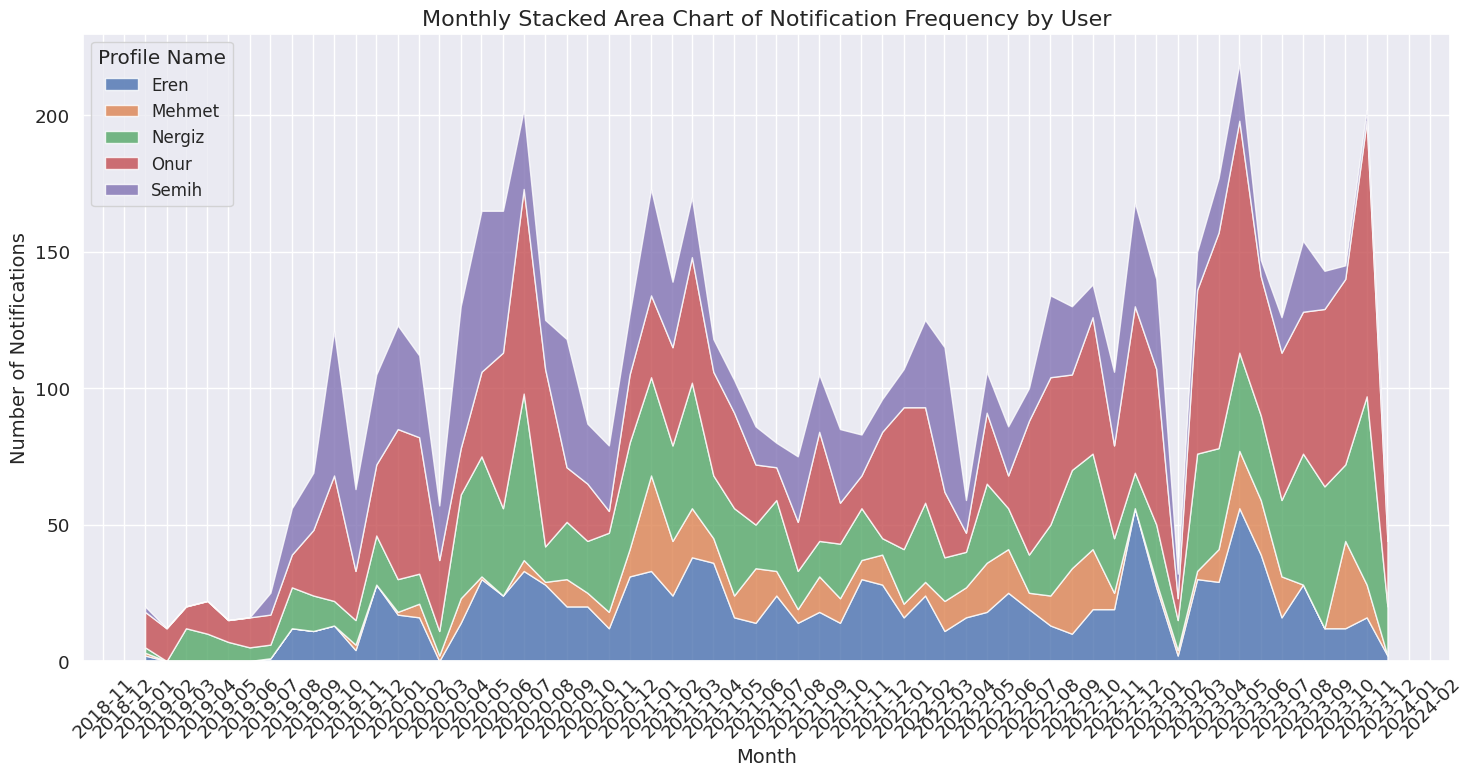

In [ ]:
# Adjusting the approach for monthly resampling
# First, ensure 'Sent Utc Ts' is in datetime format for the entire DataFrame
messages_df['Sent Utc Ts'] = pd.to_datetime(messages_df['Sent Utc Ts'])

# Group by date and profile name, then count the occurrences
grouped_notifications = messages_df.groupby([messages_df['Sent Utc Ts'].dt.date, 'Profile Name']).size().reset_index(name='Count')
grouped_notifications['Sent Utc Ts'] = pd.to_datetime(grouped_notifications['Sent Utc Ts'])

# Grouping by month and profile name, then summing the counts

monthly_grouped = grouped_notifications.groupby([grouped_notifications['Sent Utc Ts'].dt.to_period('M'), 'Profile Name']).sum(numeric_only=True).reset_index()
monthly_grouped['Sent Utc Ts'] = monthly_grouped['Sent Utc Ts'].dt.to_timestamp()
# Pivoting for the stacked area chart
pivot_monthly_grouped = monthly_grouped.pivot(index='Sent Utc Ts', columns='Profile Name', values='Count').fillna(0)

# Creating the monthly stacked area chart
plt.figure(figsize=(15, 8))
plt.stackplot(pivot_monthly_grouped.index, pivot_monthly_grouped.T, labels=pivot_monthly_grouped.columns, alpha=0.8)

# Formatting the plot
plt.title('Monthly Stacked Area Chart of Notification Frequency by User', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Notifications', fontsize=14)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.legend(title='Profile Name', loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()

plt.show()




# Rating Analysis and Correlation Between Rating Number and Rating Average

In [ ]:
import pandas as pd

# Load the ratings data from the CSV file
ratings_df = pd.read_csv('Ratings.csv')

# Rename profiles
ratings_df['Profile Name'] = ratings_df['Profile Name'].replace({
    'Onur ps5': 'Onur',
    'thanks bro': 'Semih',
    'nergiz': 'Nergiz',
    'mehmet': 'Mehmet',
    'eren': 'Eren'
})

# Assuming 'Thumbs Value' is the column that contains the ratings
# Convert it to numeric, replacing non-numeric values with NaN, then dropping those rows
ratings_df['Thumbs Value'] = pd.to_numeric(ratings_df['Thumbs Value'], errors='coerce')
ratings_df = ratings_df.dropna(subset=['Thumbs Value'])

# Calculate the average rating for each profile
average_ratings = ratings_df.groupby('Profile Name')['Thumbs Value'].mean().reset_index()

# Calculate the count of ratings for each profile
rating_counts = ratings_df.groupby('Profile Name').size().reset_index(name='Rating Count')

# Print out the results
print(average_ratings)
print(rating_counts)

  Profile Name  Thumbs Value
0         Eren      2.666667
1       Nergiz      1.857143
2         Onur      1.631579
3        Semih      1.381818
  Profile Name  Rating Count
0         Eren             3
1       Nergiz             7
2         Onur            19
3        Semih            55


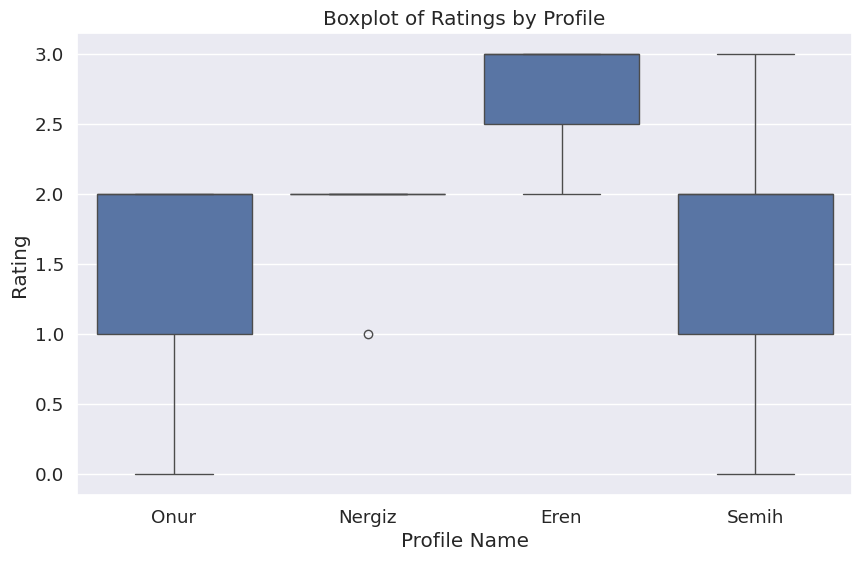

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the ratings data from the CSV file
ratings_df = pd.read_csv('Ratings.csv')

# Replace the placeholder path with the actual path to your Ratings.csv file

# Rename profiles as per the user's instructions
ratings_df['Profile Name'].replace({
    'Onur ps5': 'Onur',
    'thanks bro': 'Semih',
    'nergiz': 'Nergiz',
    'mehmet': 'Mehmet',
    'eren': 'Eren'
}, inplace=True)

# Assuming 'Thumbs Value' is the column that contains the ratings
# We'll drop any rows where 'Thumbs Value' is NaN or not a number
ratings_df['Thumbs Value'] = pd.to_numeric(ratings_df['Thumbs Value'], errors='coerce')
ratings_df.dropna(subset=['Thumbs Value'], inplace=True)

# Now, calculate the average and plot
average_ratings = ratings_df.groupby('Profile Name')['Thumbs Value'].mean().reset_index()
# Now we will create a box plot of the ratings for each profile
plt.figure(figsize=(10, 6))
sns.boxplot(data=ratings_df, x='Profile Name', y='Thumbs Value')
plt.title('Boxplot of Ratings by Profile')


plt.ylabel('Rating')
plt.xlabel('Profile Name')
plt.show()

In [ ]:
merged_df = pd.merge(average_ratings, rating_counts, on='Profile Name')

# Calculate the correlation coefficient
correlation_coefficient = merged_df['Thumbs Value'].corr(merged_df['Rating Count'])

print(f"The correlation coefficient is {correlation_coefficient}")



The correlation coefficient is -0.7664219647936433


The correlation coefficient between the "Rating Count" and "Average Rating" is **-0.76**. This indicates that there is a **strong negative correlation** between them.

This means that people with higher rating counts (ie. people who do rate more often) have a higher chance of rating a lower score than the average watcher.

<ipython-input-82-0b227660145b>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


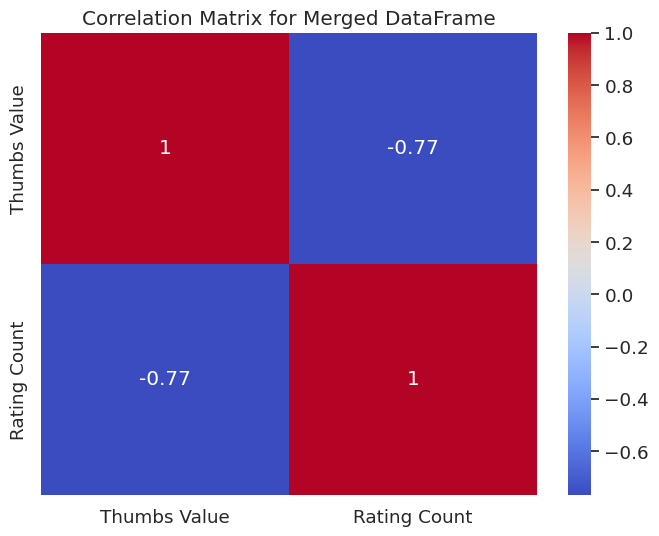

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is the DataFrame obtained from merging average_ratings and rating_counts
# Calculate the correlation matrix
corr_matrix = merged_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Merged DataFrame')
plt.show()

# Search Behavior

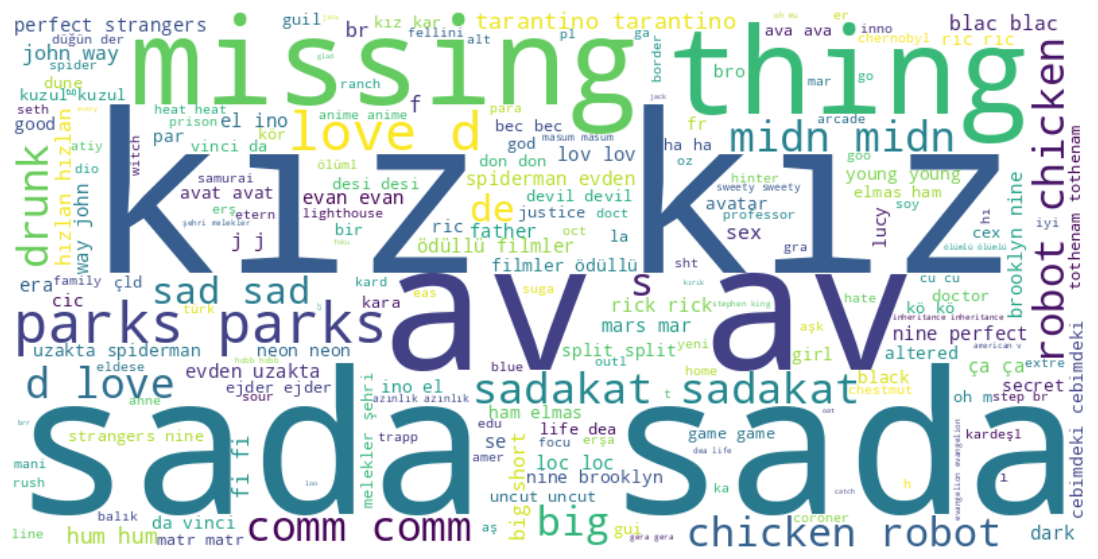

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the search history data
search_history_df = pd.read_csv('SearchHistory.csv')

# Combine all search queries into a single string
text = ' '.join(search_history_df['Query Typed'].dropna().astype(str).values)

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis labels
plt.show()

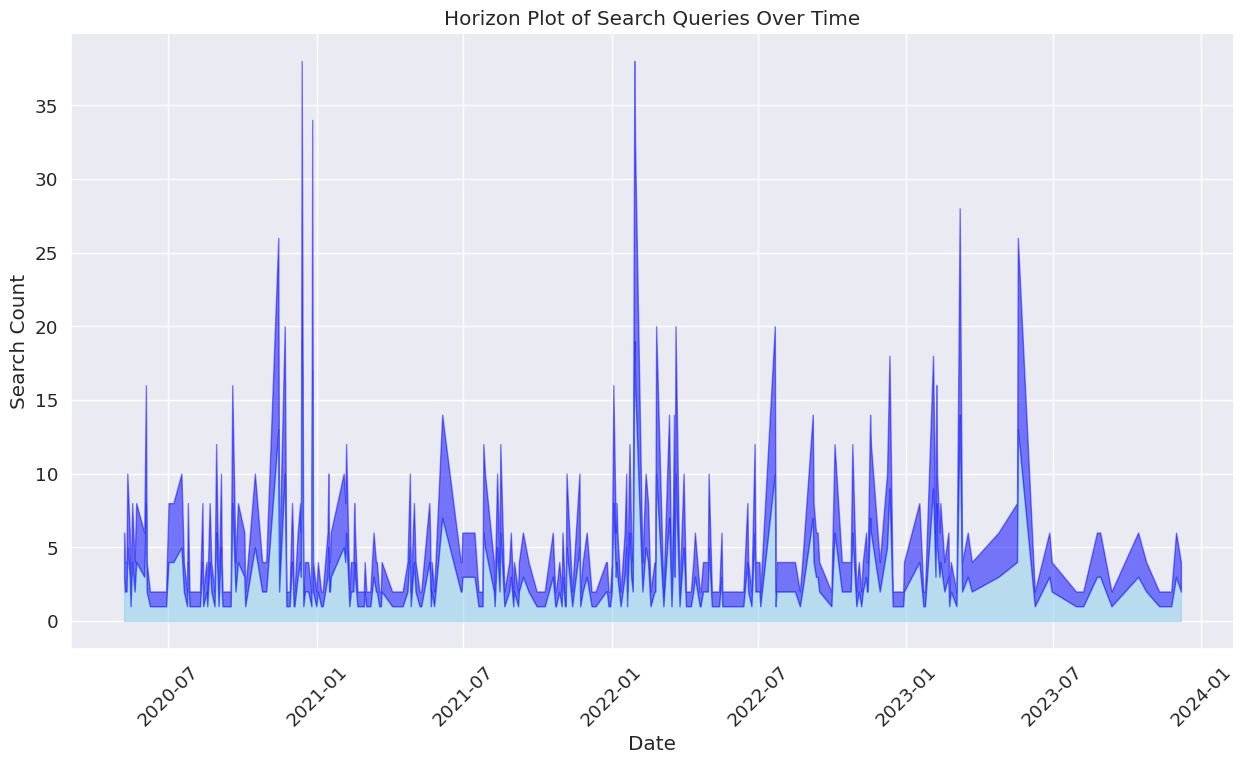

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Utc Timestamp' is in datetime format
search_history_df['Utc Timestamp'] = pd.to_datetime(search_history_df['Utc Timestamp'])

# Group by the date of the 'Utc Timestamp'
daily_counts = search_history_df.groupby(search_history_df['Utc Timestamp'].dt.date).size()

# Plot
fig, ax = plt.subplots(figsize=(15, 8))
ax.fill_between(daily_counts.index, 0, daily_counts.values, color="skyblue", alpha=0.5)
# For the horizon plot effect, you would typically offset the values, but here we'll just multiply by 2 for demonstration.
ax.fill_between(daily_counts.index, daily_counts.values, daily_counts.values * 2, color="blue", alpha=0.5)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Search Count')
plt.title('Horizon Plot of Search Queries Over Time')
plt.show()


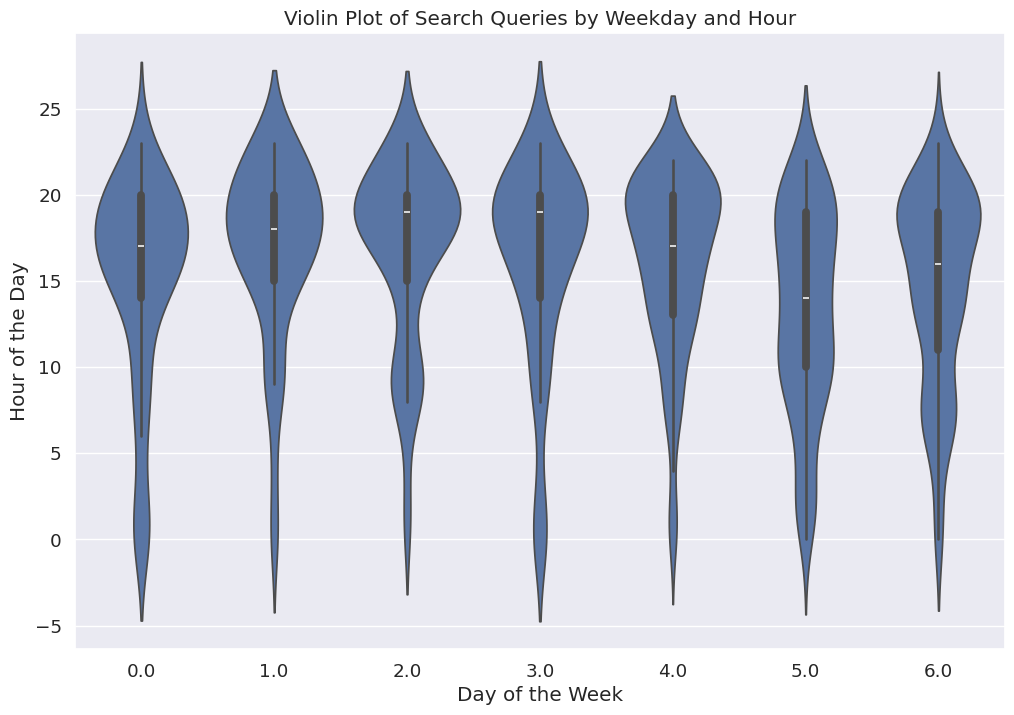

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure to convert 'Utc Timestamp' to a datetime object if it's not already
search_history_df['Utc Timestamp'] = pd.to_datetime(search_history_df['Utc Timestamp'])

# Now create the 'Weekday' column
search_history_df['Weekday'] = search_history_df['Utc Timestamp'].dt.weekday

# Plot using seaborn's violinplot
plt.figure(figsize=(12, 8))
sns.violinplot(x="Weekday", y=search_history_df['Utc Timestamp'].dt.hour, data=search_history_df)
plt.title('Violin Plot of Search Queries by Weekday and Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()




# Correlation Analysis Between the Frequency and Viewing Time

In [ ]:

import pandas as pd

# Function to convert Duration to a total number of minutes
def convert_duration(duration_str):
    h, m, s = duration_str.split(':')
    return int(h) * 60 + int(m) + int(s) / 60

# Load the data
search_history_df = pd.read_csv('SearchHistory.csv')
viewing_activity_df = pd.read_csv('ViewingActivity.csv')

# Convert Utc Timestamp to datetime and extract the date
search_history_df['Search Date'] = pd.to_datetime(search_history_df['Utc Timestamp']).dt.date

# Aggregate search counts by date and profile name
search_counts = search_history_df.groupby(['Profile Name', 'Search Date']).size().reset_index(name='Search Count')

# Apply the duration conversion function
viewing_activity_df['Total Duration (min)'] = viewing_activity_df['Duration'].apply(convert_duration)

# Aggregate total watch time by date and profile name
viewing_activity_df['View Date'] = pd.to_datetime(viewing_activity_df['Start Time']).dt.date
total_watch_time = viewing_activity_df.groupby(['Profile Name', 'View Date'])['Total Duration (min)'].sum().reset_index()

# Merge the search counts with the total watch time on profile name and date
merged_data = pd.merge(search_counts, total_watch_time, left_on=['Profile Name', 'Search Date'], right_on=['Profile Name', 'View Date'], how='outer')

# Calculate the correlation between search count and total watch time
correlation = merged_data[['Search Count', 'Total Duration (min)']].corr()

print(correlation)


                      Search Count  Total Duration (min)
Search Count              1.000000              0.212106
Total Duration (min)      0.212106              1.000000


The correlation coefficient between "Search Count" and "Total Watch Minutes" is approximately **0.212**. This suggests a **weak positive linear relationship** between the frequency of searches and the total duration of viewing.

It means that profiles with a higher number of searches tend to have slightly longer total viewing durations, but the relationship is not strong. This **may** imply that there may be several other factors that affect total watch time other than the search count and vice versa.

With such a weak correlation, it would be unwise to make predictions for one of them using the other.

<ipython-input-89-a1beb01af624>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_data.corr()


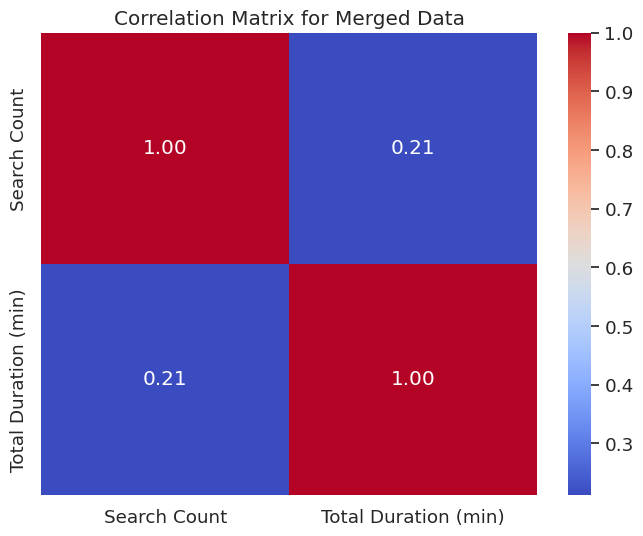

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for merged_data
corr_matrix = merged_data.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Merged Data')
plt.show()


# Correlation Analysis Between Ratings and Search Behavior

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Load the search history data
search_history_data = pd.read_csv('SearchHistory.csv')
search_history_df = pd.DataFrame(search_history_data)

# Calculate search counts
search_counts = search_history_df['Displayed Name'].value_counts().reset_index()
search_counts.columns = ['Displayed Name', 'Search Count']

# Merge search counts with search history
search_history_df = pd.merge(search_history_df, search_counts, on='Displayed Name')

# Load the ratings data
ratings_data = pd.read_csv('Ratings.csv')
ratings_df = pd.DataFrame(ratings_data)

# Merge the two dataframes on 'Profile Name' and 'Displayed Name'/'Title Name'
merged_df = pd.merge(search_history_df, ratings_df, how='inner', left_on=['Profile Name', 'Displayed Name'], right_on=['Profile Name', 'Title Name'])

# Calculate the correlation between 'Search Count' and 'Thumbs Value'
correlation, _ = pearsonr(merged_df['Search Count'], merged_df['Thumbs Value'])
print(f'Correlation: {correlation}')



Correlation: -0.8935550043556171


The correlation coefficient between "Search Count" and "Thumbs Value" (ie. the Rating Score) is approximately **-0.89** which is a **strong negative correlation**. This suggests that users who search for a show more often tend to give it a lower rating. Conversely, shows that are searched for less often tend to receive a higher rating.

<ipython-input-91-16188da727ee>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


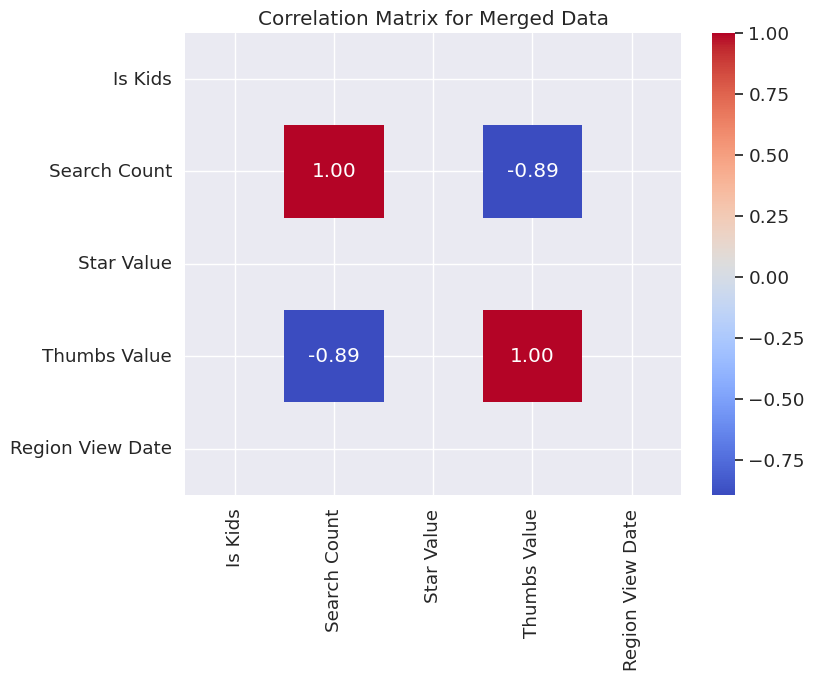

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is already created as per your previous code

# Calculate the correlation matrix for merged_df
corr_matrix = merged_df.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Merged Data')
plt.show()


# Correlation Analysis Between Ratings and Watch Time

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Load the viewing activity data
viewing_activity_data = pd.read_csv('ViewingActivity.csv')
viewing_activity_df = pd.DataFrame(viewing_activity_data)

# Convert Duration to total seconds for easier analysis
viewing_activity_df['Total Seconds'] = viewing_activity_df['Duration'].apply(
    lambda x: sum(int(t) * 60**i for i, t in enumerate(reversed(x.split(':')))))

# Load the ratings data
ratings_data = pd.read_csv('Ratings.csv')
ratings_df = pd.DataFrame(ratings_data)

# Merge the two dataframes on 'Profile Name' and 'Title'/'Title Name'
merged_df = pd.merge(viewing_activity_df, ratings_df, how='inner', left_on=['Profile Name', 'Title'], right_on=['Profile Name', 'Title Name'])

# Calculate the correlation between 'Total Seconds' and 'Thumbs Value'
correlation, _ = pearsonr(merged_df['Total Seconds'], merged_df['Thumbs Value'])
print(f'Correlation: {correlation}')

Correlation: 0.37952559152199994


The correlation coefficient between "Viewing Activity" and "Ratings" (or the Thumbs Value) is **0.38**. This suggests a **weak positive relationship** between the two.

This means that users who watch a show for longer durations tend to give it a slightly higher rating (as indicated by the ‘Thumbs Value’). However, because the correlation is weak, there are likely other factors at play influencing both watch time and ratings.

# **Monthly Average Watching Time vs Weather Conditions (Hypothesis)**

In [ ]:
# Extract the year and month from 'Start Time'
eren_data['YearMonth'] = eren_data['Start Time'].dt.to_period('M')

# Group by year and month and sum the durations
monthly_duration = eren_data.groupby('YearMonth')['Duration'].sum()

# Convert duration to hours
monthly_average_hours = monthly_duration.dt.total_seconds() / 3600

# Display the monthly averages
print(monthly_average_hours)


YearMonth
2019-07     17.197778
2019-09      8.198611
2019-10     16.788056
2019-11      0.054167
2019-12      9.641667
2020-04     43.085000
2020-05     15.740556
2020-06     11.601944
2020-07      6.394722
2020-08      5.206667
2020-09      9.955833
2020-10     14.570000
2020-11      9.466389
2020-12     13.751111
2021-01      0.684444
2021-02      2.223611
2021-03     73.271667
2021-04      0.138889
2021-05      2.778889
2021-06      8.991667
2021-07     18.336389
2021-08      1.843333
2021-09     14.591667
2021-10     12.273889
2021-11      6.188611
2021-12      0.440000
2022-01      8.299444
2022-02      8.039167
2022-03      0.009722
2022-04      0.121944
2022-05      7.538056
2022-06     11.780278
2022-07     15.774722
2022-08     18.082778
2022-09    199.682778
2022-10      0.025000
2022-11      0.036111
2022-12      3.162778
2023-01     40.019167
2023-02     33.239444
2023-03      1.354444
2023-04      0.003889
2023-05      0.566111
2023-06      7.381389
2023-07     86.336389


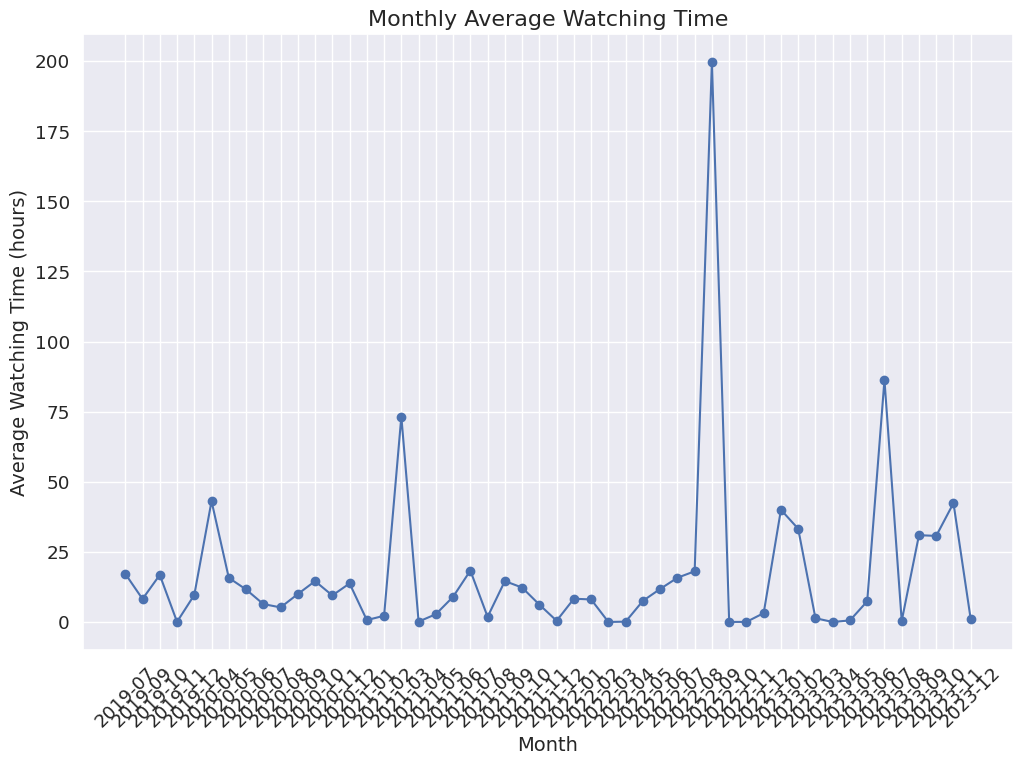

In [ ]:
# Create a larger figure
plt.figure(figsize=(12, 8))

# Create a line plot
plt.plot(monthly_average_hours.index.strftime('%Y-%m'), monthly_average_hours.values, marker='o', linestyle='-')

# Add title and labels
plt.title('Monthly Average Watching Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Watching Time (hours)', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the graph
plt.show()


In [ ]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'ViewingActivity.csv'  # Replace with your file path
viewing_data = pd.read_csv(file_path)

# Convert 'Start Time' to datetime
viewing_data['Start Time'] = pd.to_datetime(viewing_data['Start Time'])

# Filter for 'eren' profile and create a copy to avoid SettingWithCopyWarning
eren_data = viewing_data[viewing_data['Profile Name'].str.lower() == 'eren'].copy()

# Convert 'Duration' from string to timedelta
eren_data['Duration'] = pd.to_timedelta(eren_data['Duration'])

# Function to map month to season
def map_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the season mapping
eren_data['Season'] = eren_data['Start Time'].dt.month.apply(map_season)

# Group by season and sum the durations
seasonal_duration = eren_data.groupby('Season')['Duration'].sum()

# Convert duration to hours and calculate average per month for each season
seasonal_average_hours = seasonal_duration.dt.total_seconds() / 3600 / 3

# Display the seasonal averages
print(seasonal_average_hours)


Season
Fall      131.956389
Spring     48.203056
Summer     69.761019
Winter     40.158333
Name: Duration, dtype: float64


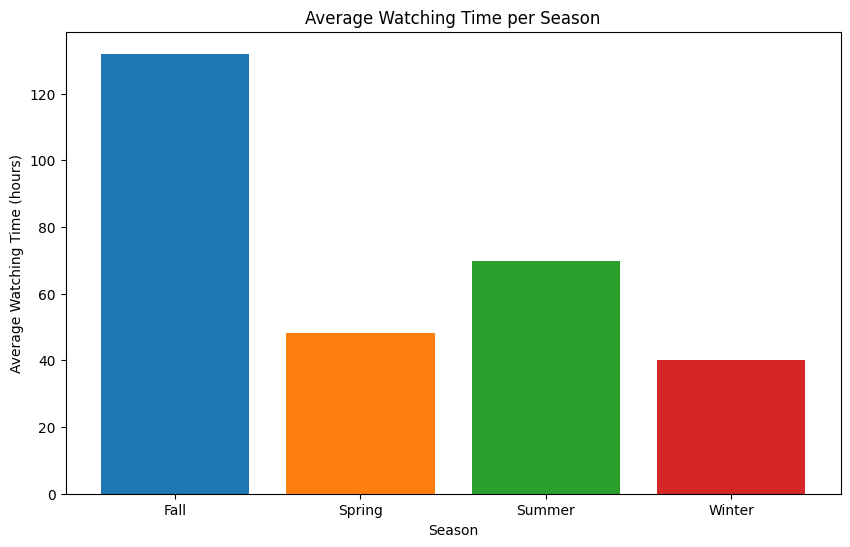

In [ ]:
# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(seasonal_average_hours.index, seasonal_average_hours.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Add title and labels
plt.title('Average Watching Time per Season')
plt.xlabel('Season')
plt.ylabel('Average Watching Time (hours)')

# Show the graph
plt.show()


Season
Fall_Winter      516.344167
Spring_Summer    353.892222
Name: Duration, dtype: float64


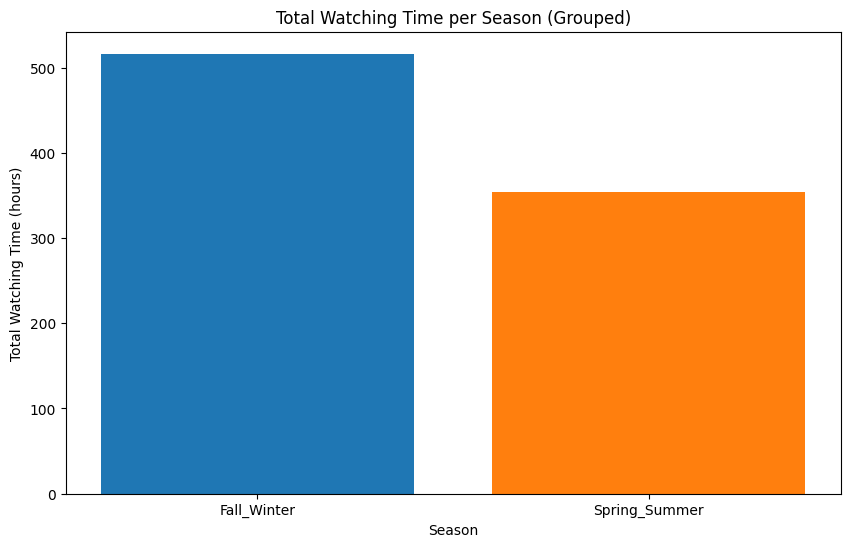

In [ ]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'ViewingActivity.csv'  # Replace with your file path
viewing_data = pd.read_csv(file_path)

# Convert 'Start Time' to datetime
viewing_data['Start Time'] = pd.to_datetime(viewing_data['Start Time'])

# Filter for 'eren' profile and create a copy to avoid SettingWithCopyWarning
eren_data = viewing_data[viewing_data['Profile Name'].str.lower() == 'eren'].copy()

# Convert 'Duration' from string to timedelta
eren_data['Duration'] = pd.to_timedelta(eren_data['Duration'])

# Function to map month to season, grouping Fall and Winter together, and Spring and Summer together
def map_season(month):
    if month in [12, 1, 2]:
        return 'Fall_Winter'
    elif month in [3, 4, 5]:
        return 'Spring_Summer'
    elif month in [6, 7, 8]:
        return 'Spring_Summer'
    elif month in [9, 10, 11]:
        return 'Fall_Winter'

# Apply the season mapping
eren_data['Season'] = eren_data['Start Time'].dt.month.apply(map_season)

# Group by season and sum the durations
seasonal_duration = eren_data.groupby('Season')['Duration'].sum()

# Convert duration to hours and calculate average per grouped season
seasonal_average_hours = seasonal_duration.dt.total_seconds() / 3600

# Display the seasonal averages
print(seasonal_average_hours)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(seasonal_average_hours.index, seasonal_average_hours.values, color=['#1f77b4', '#ff7f0e'])

# Add title and labels
plt.title('Total Watching Time per Season (Grouped)')
plt.xlabel('Season')
plt.ylabel('Total Watching Time (hours)')

# Show the graph
plt.show()
